In [31]:
import hsa.simple_dqn.replay_memory as replay_memory
import hsa.simple_dqn
import hsa
import hsa.reward_evaluation as re
import pandas
import numpy as np

from hsa.dqn_mario.dqn_argparse import parse_args
from hsa.dqn_mario.dqn_input import numpy_to_dqn
from hsa.simple_dqn.deepqnetwork import DeepQNetwork
from hsa.dqn_mario.dqn_configurations import Deep3QNetwork

In [2]:
%matplotlib inline

In [3]:
import importlib

# importlib.reload(hsa.dqn_mario.dqn_input)
importlib.reload(replay_memory)

<module 'hsa.simple_dqn.replay_memory' from '/home/peer/PycharmProjects/neslearn/hsa/simple_dqn/replay_memory.py'>

In [3]:
args = parse_args("")


inputs = pandas.read_hdf("mario_1_1_first.hdf", key="inputs")
rams = pandas.read_hdf("mario_1_1_first.hdf", key="rams")

dqn_inputs = np.array([numpy_to_dqn(row) for row in inputs.values])

rewarder = re.MultiReward(re.MarioDeath(), re.MarioScore(), re.MarioXAcceleration())

rewards = np.array([rewarder.reward(row) for row in rams.values])

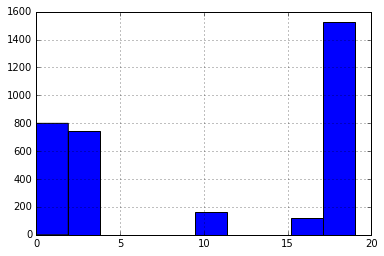

In [27]:
pandas.Series(dqn_inputs).hist()

In [3]:
the_memories = replay_memory.ReplayMemory(8000, args)

In [ ]:
ram_np = rams.values
for i in range(rewards.shape[0]):
    the_memories.add(dqn_inputs[i], rewards[i], ram_np[i], False)

In [7]:
prestates, actions, rewards, poststates, terminals = the_memories.getMinibatch()

In [10]:
poststates.shape

(8, 2048)

In [41]:
dqn = DeepQNetwork(255, args)
dqn.load_weights("dqn_weights/1Layer/second_dqn_weights")

In [42]:
prediction = dqn.predict(np.array(
    [rams.values[60], rams.values[120],
     rams.values[280], rams.values[340], 
     rams.values[800], rams.values[1000],
     rams.values[2000], rams.values[300], ]))

In [43]:
rands = np.random.uniform(120, 3000, (200, 8)).astype(dtype=np.int32)
large_prediction = np.concatenate([dqn.predict(np.array([rams.values[i] for i in batch_indexes])) for batch_indexes in rands])

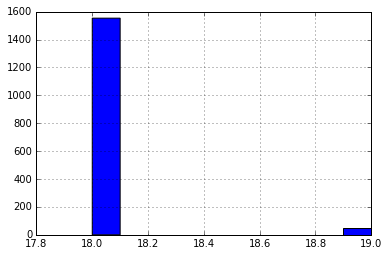

In [44]:
pandas.Series([prediction.argmax() for prediction in large_prediction]).hist()

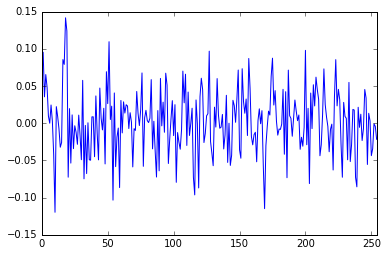

In [45]:
pandas.Series(prediction[0]).plot()

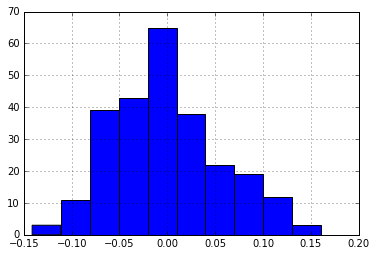

In [25]:
pandas.Series(prediction[0]).hist()

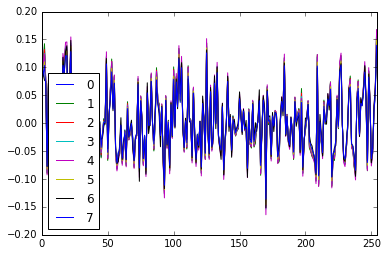

In [26]:
pandas.DataFrame(prediction.T).plot()